In [1]:
import SimpleITK as sitk
import dltk
import numpy as np
import os
%matplotlib inline
import numpy as np
import pandas as pd
import dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt
from skimage import measure, morphology
import cv2
from scipy.ndimage import zoom

/home/user/anaconda3/envs/tensorgpu4/lib/python3.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [2]:
ROOT_DIR = os.path.abspath("../")
DATASET_PATH = os.path.join(ROOT_DIR, "dataset")
print(os.listdir(DATASET_PATH))

['y_train_clef.npy', 'TB-Dataset', '2021-data']


In [3]:
subset_train_vols_path = os.path.join(DATASET_PATH, 'TB-Dataset/cavern_report_train_CT_2/')
subset_train_vols = sorted(os.listdir(subset_train_vols_path))

#subset_train_vols.remove('.DS_Store')

print("Total Patient volumes: ", len(subset_train_vols))
subset_train_vols[:5]

Total Patient volumes:  30


['TRN_30.nii.gz',
 'TRN_31.nii.gz',
 'TRN_32.nii.gz',
 'TRN_33.nii.gz',
 'TRN_34.nii.gz']

In [4]:
INPUT_FOLDER = subset_train_vols_path
patients = subset_train_vols

In [5]:
pts = []

In [6]:
for ps in os.listdir(INPUT_FOLDER):
    print("Image Name", ps)
    t1 = sitk.ReadImage(INPUT_FOLDER+ps)
    t2 = sitk.GetArrayFromImage(t1)
    pts.append(t2)

Image Name TRN_42.nii.gz
Image Name TRN_44.nii.gz
Image Name TRN_35.nii.gz
Image Name TRN_48.nii.gz
Image Name TRN_49.nii.gz
Image Name TRN_53.nii.gz
Image Name TRN_31.nii.gz
Image Name TRN_59.nii.gz
Image Name TRN_40.nii.gz
Image Name TRN_30.nii.gz
Image Name TRN_41.nii.gz
Image Name TRN_47.nii.gz
Image Name TRN_43.nii.gz
Image Name TRN_52.nii.gz
Image Name TRN_45.nii.gz
Image Name TRN_51.nii.gz
Image Name TRN_38.nii.gz
Image Name TRN_39.nii.gz
Image Name TRN_55.nii.gz
Image Name TRN_56.nii.gz
Image Name TRN_37.nii.gz
Image Name TRN_57.nii.gz
Image Name TRN_34.nii.gz
Image Name TRN_58.nii.gz
Image Name TRN_36.nii.gz
Image Name TRN_54.nii.gz
Image Name TRN_46.nii.gz
Image Name TRN_50.nii.gz
Image Name TRN_33.nii.gz
Image Name TRN_32.nii.gz


In [7]:
len(pts)

30

In [8]:
w, h = 128, 128
def rs_img(img):
    '''W and H is 128 now
    '''
    img = np.transpose(img)
    flatten = [cv2.resize(img[:,:,i], (w, h), interpolation=cv2.INTER_CUBIC) for i in range(img.shape[-1])]
    img = np.array(np.dstack(flatten)) 
    return img

In [9]:
def change_depth(img):
    desired_depth = 128
    current_depth = img.shape[-1]
    depth = current_depth / desired_depth
    depth_factor = 1 / depth
    img_new = zoom(img, (1, 1, depth_factor), mode='nearest')
    return img_new

In [10]:
dep = []

In [11]:
for pt in pts:
    img = rs_img(pt)
    img = change_depth(img)
    print(img.shape)
    dep.append(img)

(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)


# Visualize

In [12]:
def show_images(images, cols = 1, titles = None, save_fig = "default"):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, int(np.ceil(n_images/cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        plt.axis("off")
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.savefig('{}'.format(save_fig), dpi=10)
    plt.show()

In [13]:
image_number = 11
img_3d = dep[1]
print(img_3d.shape)

(128, 128, 128)


In [14]:
images = []

# get individual slices from 3d image
    images.append(img_3d[:,:,i])
    
images = np.array(images)
print(len(images))

128


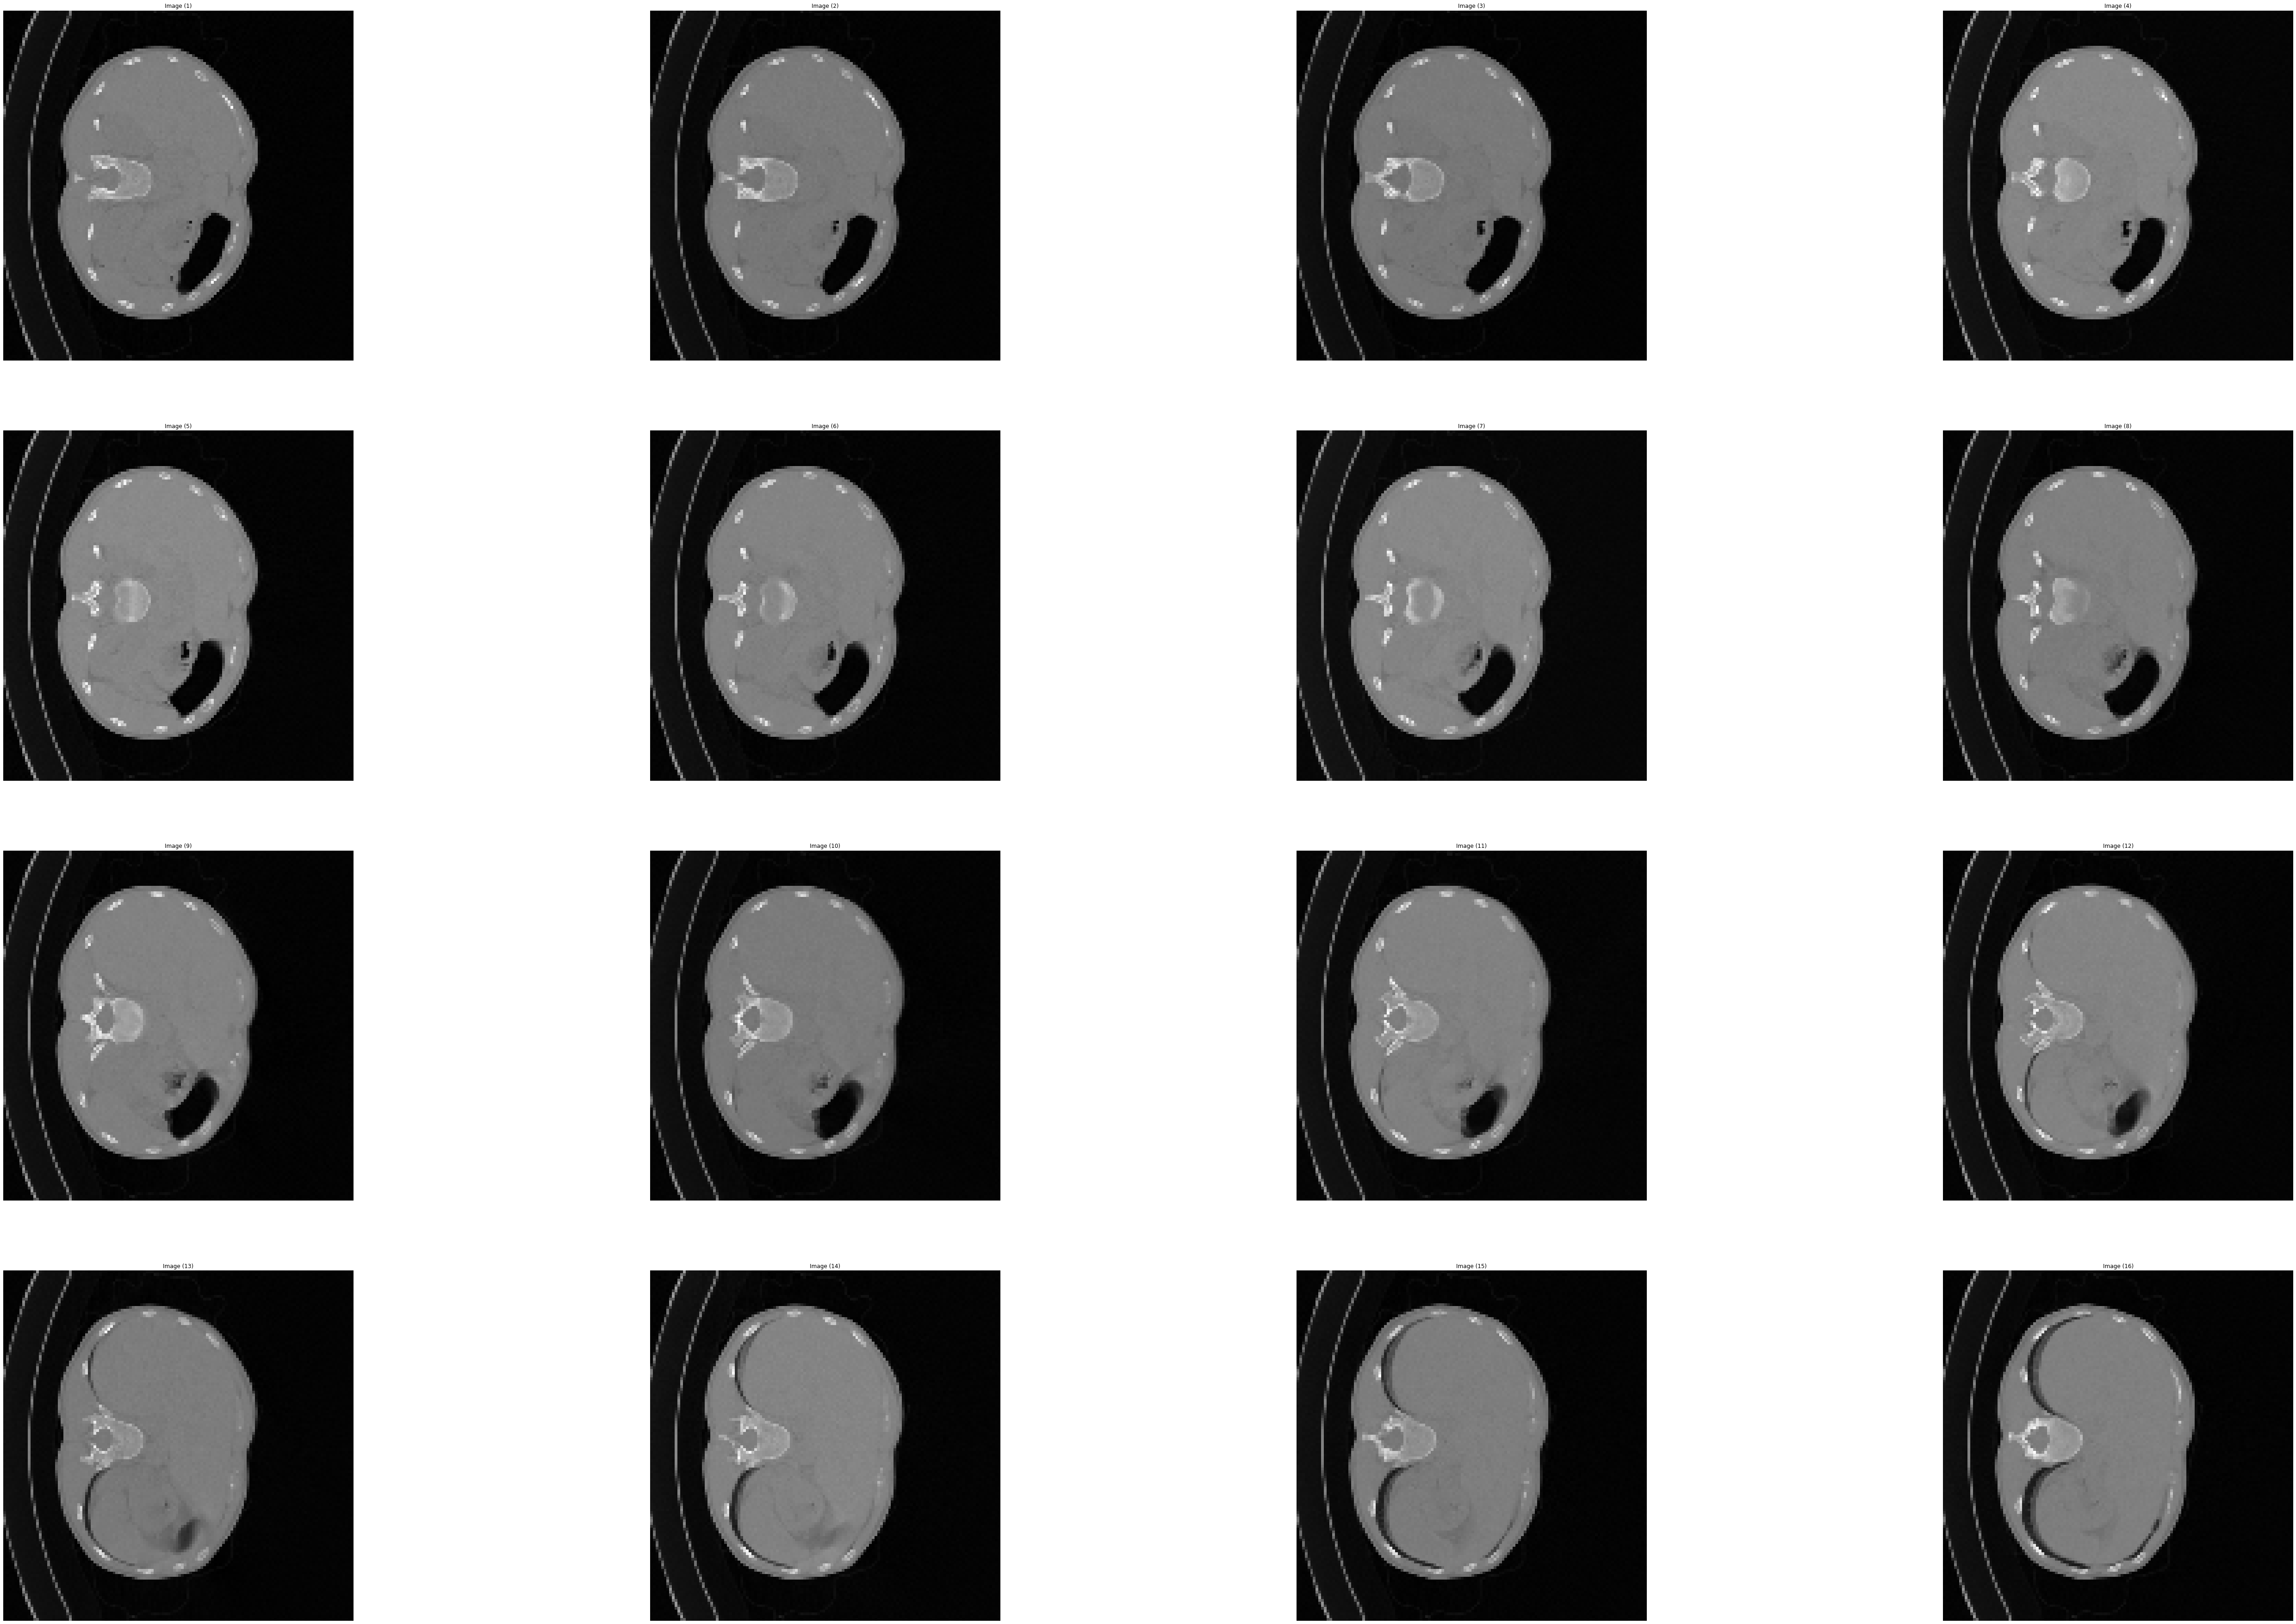

In [15]:
show_images(images[:16], cols = 4, titles = None, save_fig="ct-scans")

In [16]:
dep = np.array(dep)
npy = np.save('x_train_2_128.npy', dep)

In [17]:
a = np.load("x_train_2_128.npy")
a.shape

(30, 128, 128, 128)